In [1]:
import pandas as pd
import paths as pt
import glob
import os
from utility import plot
matplotlib_style = 'default'
import matplotlib.pyplot as plt; plt.style.use(matplotlib_style)
import seaborn as sns
from pathlib import Path
import paths as pt

plt.rcParams.update({'axes.labelsize': 'small',
                     'axes.titlesize': 'small',
                     #'axes.grid': 'false',
                     'font.size': 14.0})

class _TFColor(object):
    """Enum of colors used in TF docs."""
    red = '#F15854'
    blue = '#5DA5DA'
    orange = '#FAA43A'
    green = '#60BD68'
    pink = '#F17CB0'
    brown = '#B2912F'
    purple = '#B276B2'
    yellow = '#DECF3F'
    gray = '#4D4D4D'
    def __getitem__(self, i):
        return [
            self.red,
            self.orange,
            self.green,
            self.blue,
            self.pink,
            self.brown,
            self.purple,
            self.yellow,
            self.gray,
        ][i % 9]
TFColor = _TFColor()

def get_y_label(metric_name):
    if "Loss" in metric_name:
        return r'Loss $\mathcal{L}(\theta)$'
    elif "CTD" in metric_name:
        return 'CTD'
    elif "IBS" in metric_name:
        return "IBS"
    else:
        return "INBLL"

def get_label_name(model_name):
    if model_name == "MLP":
        return "Baseline (MLP)"
    elif model_name == "MLP-ALEA":
        return "Aleatoric"
    elif model_name == "VI-EPI":
        return "Epistemic"
    else:
        return "Aleatoric & Epistemic"
    
DATASETS = ['WHAS500']
MODEL_NAMES = ["MLP", "MLP-ALEA", "VI-EPI", "MCD"]
METRIC_NAMES = ['TrainLoss', 'TrainCTD', 'TrainIBS', 'TrainINBLL']

path = pt.RESULTS_DIR
all_files = glob.glob(os.path.join(path , "baysurv_whas500_results.csv"))
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
results = pd.concat(li, axis=0, ignore_index=True)
results = results.round(3)
n_epochs = 10
n_metrics = len(METRIC_NAMES)

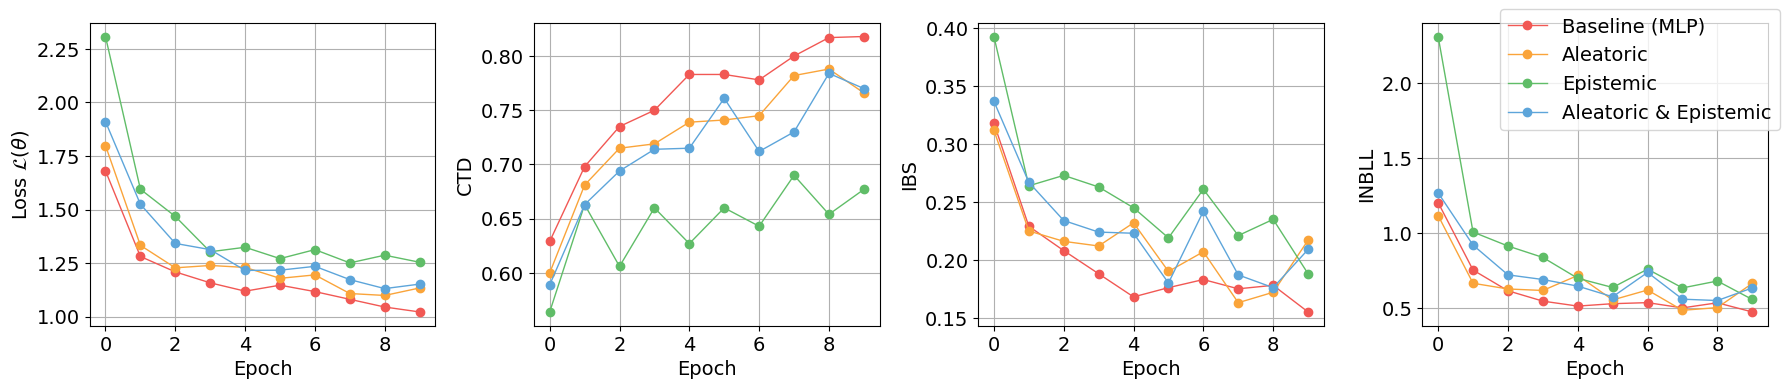

In [2]:
for dataset_name in DATASETS:
    fig, axes = plt.subplots(1, 4, figsize=(18, 4))
    for (j, metric_name) in enumerate(METRIC_NAMES):
        for (k, model_name) in enumerate(MODEL_NAMES):
            model_results = results.loc[(results['DatasetName'] == dataset_name) & (results['ModelName'] == model_name)]
            metric_results = model_results[metric_name]            
            axes[j].plot(range(n_epochs), metric_results, label=get_label_name(model_name),
                            marker="o", color=TFColor[k], linewidth=1)
        axes[j].set_xlabel('Epoch', fontsize="medium")
        axes[j].set_ylabel(get_y_label(metric_name), fontsize="medium")
        axes[j].grid()
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')
    fig.tight_layout()
    plt.savefig(Path.joinpath(pt.RESULTS_DIR, f"{dataset_name.lower()}_training_curves.pdf"),
                format='pdf', bbox_inches="tight")
    plt.show()
    plt.close()